In [1]:
import matplotlib.patches as mpatches
import os
import autograd.numpy as np
import matplotlib.pylab as pylab
import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from autograd import elementwise_grad, value_and_grad
from mpl_toolkits.mplot3d import Axes3D
from problems import func1, func2, func3, func4
from AA import numpyAA
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})
def_colors=(plt.rcParams['axes.prop_cycle'].by_key()['color'])
import seaborn as sns
# sns.set_theme()
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
params = {'mathtext.default': 'regular' } 
plt.rcParams.update(params)

In [3]:
def simgd(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    for i in range(iteration):
        g_x, g_y = problem.grad(x,y)
        x -= lr * g_x
        y += lr * g_y
        x_hist.append(x)
        y_hist.append(y)
        loss.append(problem.loss(x, y))
    return loss, x_hist, y_hist


def altgd(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    for i in range(iteration):
        g_x, _ = problem.grad(x,y)
        x -= lr * g_x
        _, g_y = problem.grad(x,y)
        y += lr * g_y
        x_hist.append(x)
        y_hist.append(y)
        loss.append(problem.loss(x, y))
    return loss, x_hist, y_hist


def adam(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    LR = lr
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    BETA_1 = 0.0
    BETA_2 = 0.99
    EPSILON = 1e-8
    v_x, v_y = 0., 0.
    m_x, m_y = 0., 0.
    for i in range(iteration):
        g_x, g_y = problem.grad(x,y)
        m_x = BETA_1*m_x + (1-BETA_1)*g_x
        m_y = BETA_1*m_y + (1-BETA_1)*g_y 
        v_x = BETA_2*v_x + (1-BETA_2)*g_x**2
        v_y = BETA_2*v_y + (1-BETA_2)*g_y**2
        m_hat_x = m_x/(1-BETA_1**(i+1))
        m_hat_y = m_y/(1-BETA_1**(i+1))
        v_hat_x = v_x
        v_hat_y = v_y
        x = x - LR*m_hat_x/(np.sqrt(v_hat_x)+EPSILON)
        y = y + LR*m_hat_y/(np.sqrt(v_hat_y)+EPSILON)
        x_hist.append(x)
        y_hist.append(y)
        loss.append(problem.loss(x, y))
    return loss, x_hist, y_hist


def avg(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    xavg, yavg = x, y
    x_hist, y_hist = [xavg], [yavg]
    for i in range(iteration):
        x = x - lr/np.sqrt(i+1)*(y)
        y = y + lr/np.sqrt(i+1)*(x)        
        xavg = xavg*(i+1)/(i+2) + x/(i+2)
        yavg = yavg*(i+1)/(i+2) + y/(i+2)        
        x_hist.append(xavg)
        y_hist.append(yavg)
        loss.append(problem.loss(xavg, yavg))
    return loss, x_hist, y_hist

def omd(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    x_l, y_l = 0.5*x0, 0.5*y0
    g_xl, g_yl = problem.grad(x_l,y_l)
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    for i in range(iteration):
        g_x, g_y = problem.grad(x,y)
        x = x - 2 * lr * g_x + lr * g_xl
        y = y + 2 * lr * g_y - lr * g_yl
        x_hist.append(x)
        y_hist.append(y)
        g_xl, g_yl =  g_x, g_y
        loss.append(problem.loss(x, y))
    return loss, x_hist, y_hist

def eg(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    for i in range(iteration):
        g_x, g_y = problem.grad(x,y)
        xe = x - lr * g_x
        ye = y + lr * g_y
        g_x, g_y = problem.grad(xe,ye)
        x -= lr * g_x
        y += lr * g_y
        x_hist.append(x)
        y_hist.append(y)
        loss.append(problem.loss(x, y))
    return loss, x_hist, y_hist

def fr(problem, x0, y0, iteration, lr, k=0):
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]    
    for i in range(iteration):
        g_x, g_y = problem.grad(x,y)
        mod = problem.fr(x, y)
        x -= lr * g_x
        y += lr * g_y + lr * mod * g_x
        x_hist.append(x)
        y_hist.append(y)
        loss.append(problem.loss(x, y))
    return loss, x_hist, y_hist

In [4]:
def GD3A(problem, x0, y0, iteration, lr, k, type2=True, reg=1e-10):
    '''
    Proposed Methods: alternating GDA with Anderson Acceleration with numpy
    '''
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    fp = np.vstack((x, y))
    aa = numpyAA(2, k, type2=type2, reg=reg)
    for i in range(iteration):
        fpprev = np.copy(fp)
        g_x, _ = problem.grad(x,y)
        x_ = x - lr * g_x
        _, g_y = problem.grad(x_,y)
        y_ = y + lr * g_y
        fp = np.vstack((x_, y_))
        fp = aa.apply(fpprev, fp)
        x, y = fp[0],fp[1]
        lo = problem.loss(x, y)
        loss.append(lo)
        x_hist.append(x)
        y_hist.append(y)
    return loss, x_hist, y_hist


def simGD3A(problem, x0, y0, iteration, lr, k, type2=True, reg=1e-8):
    '''
    Proposed Methods: alternating GDA with Anderson Acceleration with numpy
    '''
    x, y = x0, y0
    xopt, yopt = problem.xopt, problem.yopt
    x_hist, y_hist = [x], [y]
    loss = [np.sqrt((x-xopt)**2 + (y-yopt)**2)]
    fp = np.vstack((x, y))
    aa = numpyAA(2, k, type2=type2, reg=reg)
    for i in range(iteration):
        fpprev = np.copy(fp)
        g_x, g_y = problem.grad(x,y)
        x_ = x - lr * g_x
        y_ = y + lr * g_y
        fp = np.vstack((x_, y_))
        fp = aa.apply(fpprev, fp)
        x, y = fp[0],fp[1]
        lo = problem.loss(x, y)
        loss.append(lo)
        x_hist.append(x)
        y_hist.append(y)
    return loss, x_hist, y_hist

In [5]:
def main(problem, iteration, x0, y0, lrset, k=5):
    allloss = [[] for _ in  range(7)]
    allxpath = [[] for _ in  range(7)]
    allypath = [[] for _ in  range(7)]
    allloss[0], allxpath[0], allypath[0] = altgd(problem, x0, y0, iteration, lr=lrset['altgd'])
    allloss[1], allxpath[1], allypath[1]= simgd(problem, x0, y0, iteration, lr=lrset['simgd'])  
    allloss[2], allxpath[2], allypath[2] = adam(problem, x0, y0, iteration, lr=lrset['avg']) 
    allloss[3], allxpath[3], allypath[3] = eg(problem, x0, y0, iteration, lr=lrset['eg'])
    allloss[4], allxpath[4], allypath[4] = omd(problem, x0, y0, iteration, lr=lrset['omd'])
    allloss[5], allxpath[5], allypath[5]= GD3A(problem, x0, y0, iteration, lr=lrset['AA'], k=k)   
    allloss[6], allxpath[6], allypath[6]= simGD3A(problem, x0, y0, iteration, lr=lrset['AA'] ,k=k)   

    return allloss, allxpath, allypath

In [9]:
def plot(loss, xpath, ypath, iteration, k, start):
    x0, y0 = start
    loss0, loss2, loss3, loss4, loss5 = loss
    xpath0, xpath2, xpath3, xpath4, xpath5, xpath6= xpath
    ypath0, ypath2, ypath3, ypath4, ypath5, ypath6= ypath
    fig, axlist = plt.subplots(1, 2, figsize=(14,5))
    ax1 = axlist[0]
    ax2 = axlist[1]    
    ax1.contourf(x, y, z, 20, cmap=plt.cm.gray)
    ax1.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
    ax1.plot(xpath0, ypath0, '-', color=def_colors[0], linewidth=1, label='SimGDA',markevery=markevery)
    ax1.plot(xpath1, ypath1, '--+', color=def_colors[1], linewidth=1, label='AltGDA',markevery=markevery)
    ax1.plot(xpath2, ypath2, '--',color=def_colors[2], linewidth=1, label='Adam',markevery=markevery)
    ax1.plot(xpath3, ypath3, '-^',color=def_colors[3], linewidth=1, label='EG',markevery=markevery)
    ax1.plot(xpath4, ypath4, '-*',color=def_colors[4], linewidth=1, label='OMD',markevery=markevery)
#     ax1.plot(xpath4, ypath4, '-*',color=def_colors[4], linewidth=1, label='FR',markevery=markevery)
#     ax1.plot(xpath6, ypath6, 'b->', linewidth=2, label='SimGDA-AA', markevery=markevery)
#     ax1.plot(xpath5, ypath5, 'r-d', linewidth=2, label='AltGDA-AA', markevery=markevery)
    x_init = ax1.scatter(x0, y0, marker='s', s=100, c='k',alpha=1,zorder=1000, label='Start')
    ax1.legend([x_init],['Start'], markerscale=1, loc=4, fancybox=True, framealpha=1., fontsize=20)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')  
    ax1.set_xlim([xmin,xmax])
    ax1.set_ylim([ymin,ymax])
    
    plot_interval =1
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss7[::plot_interval], '-', color=def_colors[0], markevery=markevery, label='SimGDA')
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss1[::plot_interval], '--+', color=def_colors[1], markevery=markevery, label='AltGDA')
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss2[::plot_interval], '--',color=def_colors[2],markevery=markevery, label='Averaging')
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss3[::plot_interval], '-^',color=def_colors[3],markevery=markevery, label='Extragradient')
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss4[::plot_interval],'-*',color=def_colors[4],  markevery=markevery, label='OMD')
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss6[::plot_interval], 'b->', markevery=markevery, label='SimGDA-AA')
    ax2.semilogy(np.arange(0, iteration+plot_interval, plot_interval), loss5[::plot_interval], 'r-d', markevery=markevery, label='AltGDA-AA')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Distance to optimal')
    axlist.flatten()[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, framealpha=1., fontsize=20, markerscale=2)
    return fig

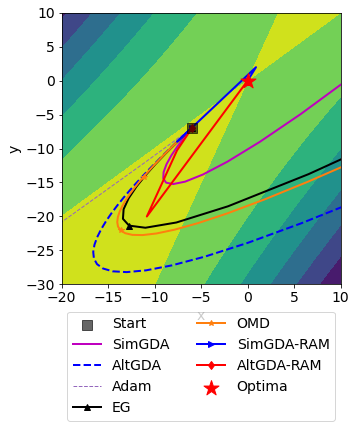

In [17]:

init_set = [-6.,-7.]
k = 2# Anderson K
iteration = 200
k = iteration
x0, y0 = init_set
problem = func1()
lr_set = {'simgd':0.06, 'altgd':0.1, 'avg':0.5, 'adam':0.001, 'eg':0.1,'omd':0.05, 'fr':0.05,'AA':0.2}
f = problem.f
loss_f3, xpath_f3, ypath_f3 = main(problem, iteration, x0, y0, lr_set, k=k)
xmin, xmax, xstep = [-20,10, .1]
ymin, ymax, ystep = [-30,10, .1]
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)
# fig4 = plot(loss_f4, xpath_f4, ypath_f4, iteration, k, [x0, y0])
fig, ax3 = plt.subplots(figsize=(5,5))
# ax4 = axlist[0]
xpath0, xpath1, xpath2, xpath3, xpath4, xpath5,xpath6= xpath_f3
ypath0, ypath1, ypath2, ypath3, ypath4, ypath5,ypath6 = ypath_f3
loss0, loss1, loss2, loss3, loss4, loss5, loss6 = loss_f3
ax3.contourf(x, y, z)
# ax3.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax3.scatter(x0, y0, marker='s', s=100, c='k',alpha=0.6,zorder=20, label='Start')
ax3.plot(xpath0, ypath0, 'm-', linewidth=2, label='SimGDA',markevery=markevery)
ax3.plot(xpath1, ypath1, 'b--', linewidth=2, label='AltGDA',markevery=markevery)
ax3.plot(xpath2, ypath2, '--',color=def_colors[4], linewidth=1, label='Adam',markevery=markevery)
ax3.plot(xpath3, ypath3, 'k-^', linewidth=2, label='EG',markevery=markevery)
ax3.plot(xpath4, ypath4, 'c-*',color=def_colors[1], linewidth=2, label='OMD',markevery=markevery)
# ax3.plot(xpath8, ypath8, '--o',color=def_colors[7], linewidth=1, label='FR',markevery=markevery)
ax3.plot(xpath6, ypath6, 'b->', linewidth=2, label='SimGDA-RAM', markevery=markevery)
ax3.plot(xpath5, ypath5, 'r-d', linewidth=2, label='AltGDA-RAM', markevery=markevery)
ax3.scatter(0, 0, s=250, marker='*', color='Red', zorder=20, label='Optima')
# ax3.legend([x_init],['Start'], markerscale=1, loc=4, fancybox=True, framealpha=1., fontsize=20)
ax3.set_xlabel('x')
ax3.set_ylabel('y')  
ax3.set_xlim([xmin,xmax])
ax3.set_ylim([ymin,ymax])
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), borderaxespad=0, fontsize=14, ncol=2)
# plt.tight_layout()
fig.savefig('figures/1dpathbour.png', dpi=300, bbox_inches = 'tight', pad_inches = 0)
